In [16]:
from src.data_loader import load_retail_data

# fulla da
df = load_retail_data()

# we'll take a sample of 100k rows
df_sample = df.sample(n=100000, random_state=42)


In [17]:
print("Full data shape:", df.shape)
print("Sample data shape:", df_sample.shape)

df_sample.info()    # type, memory, etc.
df_sample.head()    # first 5 rows


Full data shape: (541909, 8)
Sample data shape: (100000, 8)
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 209268 to 290024
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    100000 non-null  object        
 1   StockCode    100000 non-null  object        
 2   Description  99723 non-null   object        
 3   Quantity     100000 non-null  int64         
 4   InvoiceDate  100000 non-null  datetime64[ns]
 5   UnitPrice    100000 non-null  float64       
 6   CustomerID   74983 non-null   float64       
 7   Country      100000 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 6.9+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
209268,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
207108,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
167085,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom
471836,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom
115865,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom


In [18]:
# Cell 3: summary stats for purchases vs returns
purchases = df[df['Quantity'] > 0]['Quantity']
returns   = df[df['Quantity'] < 0]['Quantity'].abs()

print("=== Purchases Quantity ===")
print(purchases.describe())

print("\n=== Returns Quantity ===")
print(returns.describe())


=== Purchases Quantity ===
count    531285.000000
mean         10.655262
std         156.830323
min           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

=== Returns Quantity ===
count    10624.000000
mean        45.607210
std       1092.214216
min          1.000000
25%          1.000000
50%          2.000000
75%         10.000000
max      80995.000000
Name: Quantity, dtype: float64


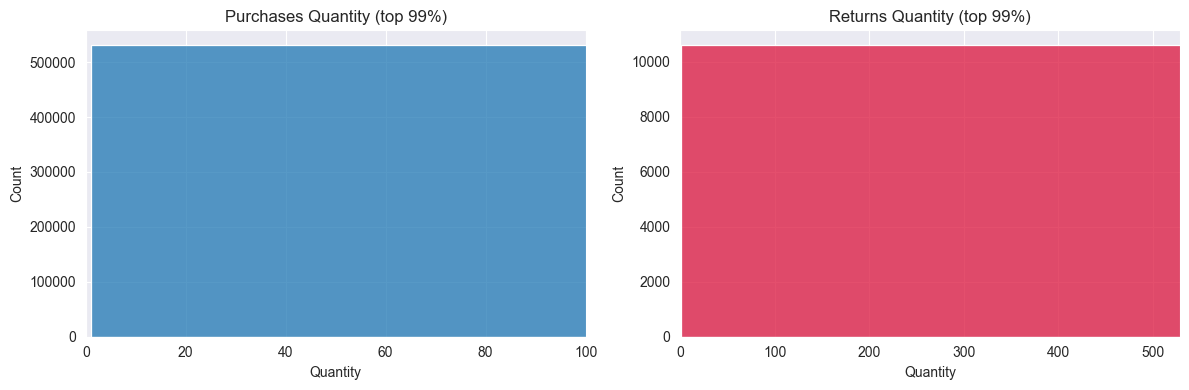

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# taking the 99th percentile
p99_p = purchases.quantile(0.99)
p99_r = returns.quantile(0.99)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# purchases
sns.histplot(purchases, bins=30, ax=axes[0])
axes[0].set_xlim(0, p99_p)
axes[0].set_title("Purchases Quantity (top 99%)")
axes[0].set_xlabel("Quantity")
axes[0].set_ylabel("Count")

# returns
sns.histplot(returns, bins=30, ax=axes[1], color='crimson')
axes[1].set_xlim(0, p99_r)
axes[1].set_title("Returns Quantity (top 99%)")
axes[1].set_xlabel("Quantity")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


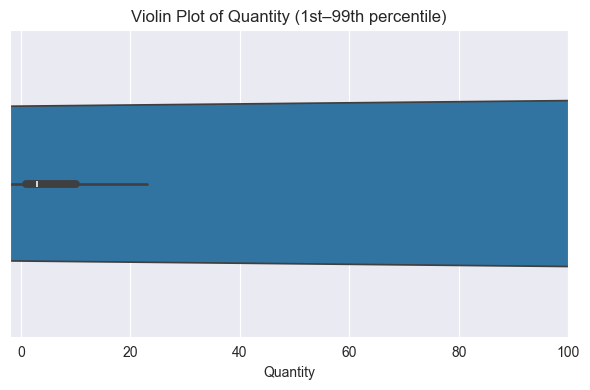

In [20]:
plt.figure(figsize=(6, 4))
sns.violinplot(x=df['Quantity'])
# cutting the quantiles
low, high = df['Quantity'].quantile([0.01, 0.99])
plt.xlim(low, high)
plt.title("Violin Plot of Quantity (1st–99th percentile)")
plt.xlabel("Quantity")
plt.tight_layout()
plt.show()
